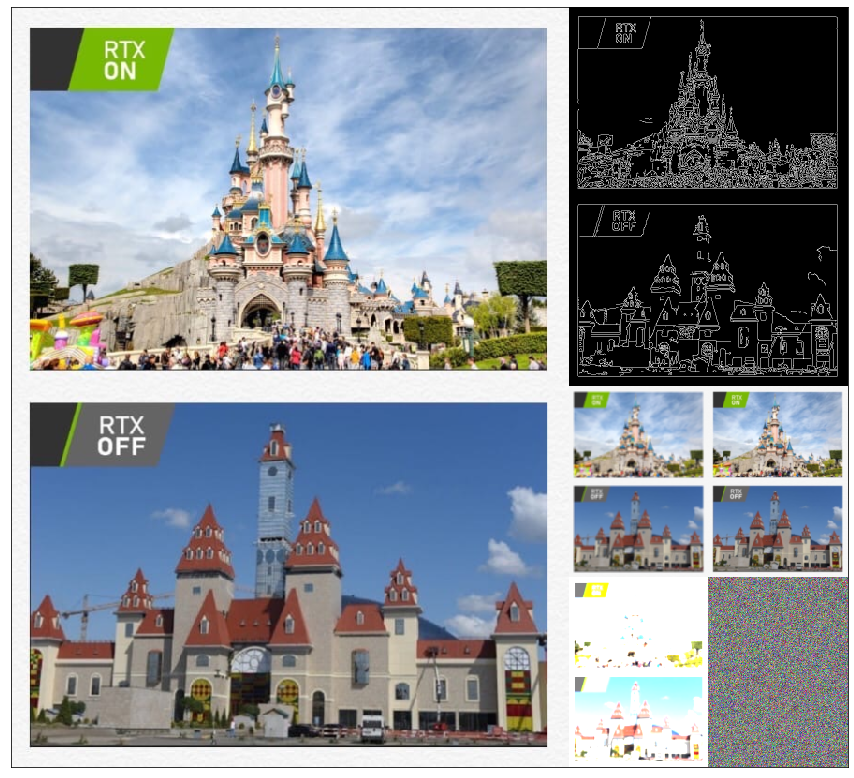

True

In [62]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def show(img):
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(RGB_img)
    plt.xticks([]), plt.yticks([])
    plt.show()


img = cv2.imread('image.jpg')
height, width, channels = img.shape
img = cv2.resize(img, (width - width % 4, height - height % 4))
height, width, channels = img.shape

res = np.zeros((height, width + width // 2, channels), np.uint8)
res.fill(255)

edges = cv2.Canny(img, 100, 200)
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
edges = cv2.resize(edges, (width // 2, height // 2))

avg = cv2.blur(img, (10, 10))
avg = cv2.resize(avg, (width // 4, height // 4))

blur = cv2.GaussianBlur(img, (11, 11), 0)
blur = cv2.resize(blur, (width // 4, height // 4))

kernel = np.random.rand(10, 10) / 20
dst = cv2.filter2D(img, -1, kernel)
dst = cv2.resize(dst, (width // 4, height // 4))

rand = np.random.rand(*img.shape) * 255
rand = cv2.resize(rand, (width // 4, height // 4))

res[0:height, 0:width] = img
res[0:height//2, width:width+width//2] = edges
res[height//2:height//2+height//4, width:width+width//4] = avg
res[height//2:height//2+height//4, width+width//4:width+width//2] = blur
res[height//2+height//4:height, width:width+width//4] = dst
res[height//2+height//4:height, width+width//4:width+width//2] = rand

show(res)
cv2.imwrite('result.jpg', res)